<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
About the Dataset
</h2>

The Student Performance dataset is a widely used educational dataset collected from two Portuguese secondary schools. It provides comprehensive information about students’ backgrounds, lifestyles, and academic progress. Each record in the dataset represents a single student and includes demographic details (such as age, gender, and family situation), family and parental background (including parents’ education and jobs), study habits, access to resources, social and romantic life, health status, and history of academic support or difficulties.

The dataset’s primary focus is on predicting students’ final grades based on these diverse factors. It contains three grade columns reflecting performance at different periods during the school year, with the final grade (G3) serving as the main target variable for analysis and machine learning models. By combining academic, social, and personal data, the Student Performance dataset enables meaningful exploration of which factors most influence educational outcomes and helps support data-driven interventions in school settings.

### Columns

**school**: Name of the student’s school.

**sex**: Student’s gender.

**age**: Age of the student.

**address**: Urban or rural home address.

**famsize**: Family size (≤3 or >3 members).

**Pstatus**: Parent’s cohabitation status (together or apart).

**Medu**: Mother’s education level.

**Fedu**: Father’s education level.

**Mjob**: Mother’s job type.

**Fjob**: Father’s job type.

**reason**: Reason for choosing this school.

**guardian**: Student’s guardian.

**traveltime**: Time taken to travel to school.

**studytime**: Weekly study time.

**failures**: Number of past class failures.

**schoolsup**: Extra educational support.

**famsup**: Family educational support.

**paid**: Extra paid classes.

**activities**: Extra-curricular activities.

**nursery**: Attended nursery school.

**higher**: Aspires to higher education.

**internet**: Internet access at home.

**romantic**: Has a romantic relationship.

**famrel**: Quality of family relationships.

**freetime**: Free time after school.

**goout**: Going out with friends.

**Dalc**: Workday alcohol consumption.

**Walc**: Weekend alcohol consumption.

**health**: Current health status.

**absences**: Number of school absences.

**G1**: First period grade.

**G2**: Second period grade.

**G3**: Final grade (target variable).

<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Data Loading
</h2>

In [1018]:
# General-purpose libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization

# Warning control
import warnings
warnings.filterwarnings("ignore") 

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Preprocessing utilities
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import MaxAbsScaler  # For scaling features

# Model selection
from sklearn.model_selection import train_test_split  # For splitting datasets

# Machine learning models
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.linear_model import Ridge  # For Ridge regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting regression
from lightgbm import LGBMRegressor  # For LightGBM regression
from catboost import CatBoostRegressor  # For CatBoost regression

# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation metrics

# Tabular data display
from tabulate import tabulate  # For printing tables in a formatted way

In [1019]:
df=pd.read_csv(r"C:\Users\NIHAL\Downloads\Student Performance Dataset.csv")  # Reading the CSV file into a DataFrame

In [1020]:
df # Show the first and last few rows of the dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**No Missing Values**: All 33 columns have 649 non-null values, ensuring a complete dataset.

**Data Types**: Includes 16 numerical (int64) and 17 categorical (object) columns, requiring encoding for categorical variables.

In [1023]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Exploratory Data Analysis
</h2>

<h3 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Univariate
</h3>

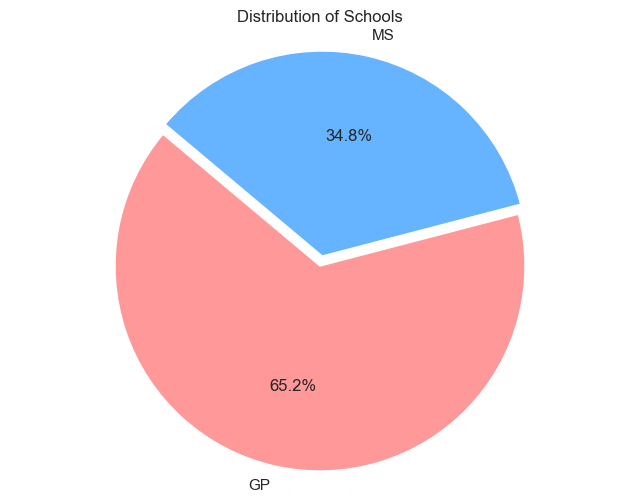

In [1026]:
school_counts = df['school'].value_counts()
plt.figure(figsize=(8, 6))
colors=['#FF9999','#66B3FF']
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', startangle=140,explode=(0.05,0),colors=colors)
plt.title('Distribution of Schools')
plt.axis('equal')  
plt.show()

***GP***: 65.2% — This school category has the majority representation in the dataset.

***MS***: 34.8% — This is the smaller group.

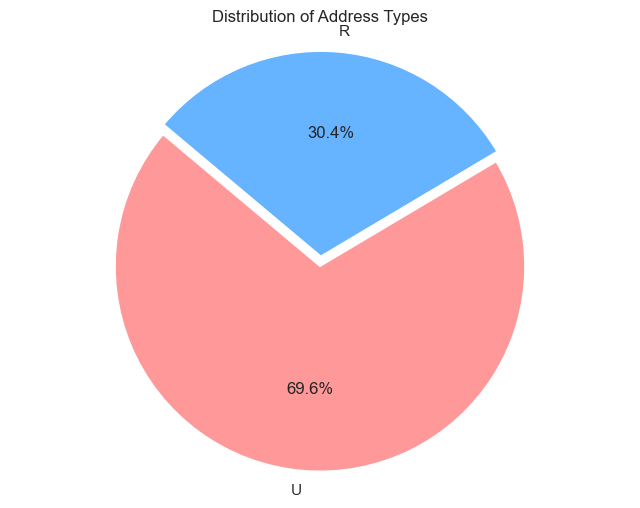

In [1028]:
address_counts = df['address'].value_counts()
plt.figure(figsize=(8, 6))
colors=['#FF9999','#66B3FF']
plt.pie(address_counts, labels=address_counts.index, autopct='%1.1f%%', startangle=140,explode=(0.05,0),colors=colors)
plt.title('Distribution of Address Types')
plt.axis('equal') 
plt.show()

- *69.6%* of the entries are from *urban (U)* areas.

- *30.4%* of the entries are from *rural (R)* areas.

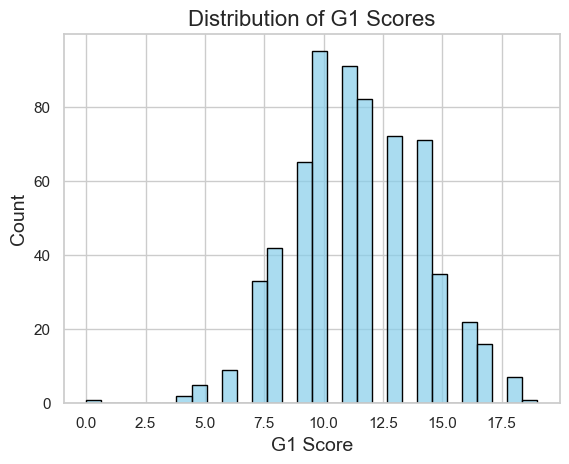

In [1030]:
sns.histplot(df["G1"],bins=30,color='skyblue',edgecolor='black',alpha=0.7)
plt.title("Distribution of G1 Scores",fontsize=16)
plt.xlabel("G1 Score",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

**Most Students Score Around 10–12**: The peak of the distribution lies in this range, indicating it's the most common performance level.

**Slight Left Skew**: The tail on the left suggests a few students have significantly lower scores, potentially needing intervention.


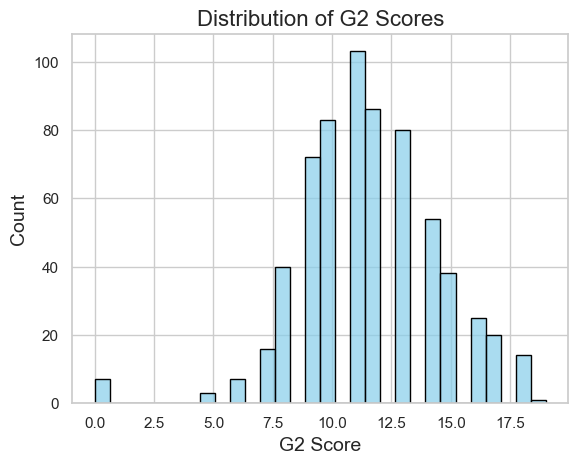

In [1032]:
sns.histplot(df["G2"],bins=30,color='skyblue',edgecolor='black',alpha=0.7)
plt.title("Distribution of G2 Scores",fontsize=16)
plt.xlabel("G2 Score",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

**Scores Cluster Around 11–13**: The majority of students scored in this range, showing a central tendency toward above-average performance.


**Few Extremely Low Scores**: A small number of students scored below 5, indicating possible academic risk or need for support.


**Slight Right Skew**: There are more students with lower scores than higher ones, slightly pulling the tail toward the left side of the distribution.

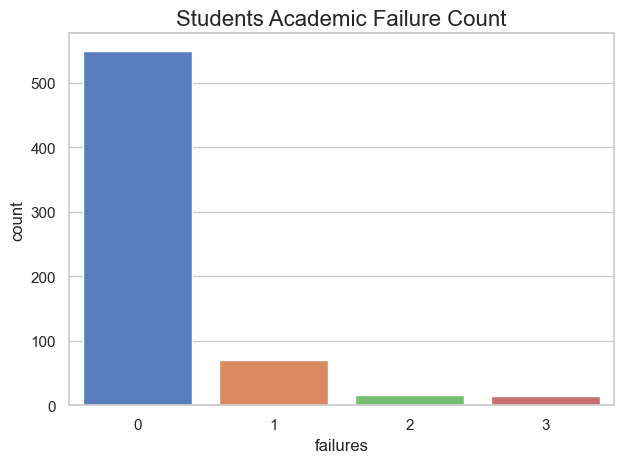

In [1034]:
sns.countplot(x='failures',data=df,palette='muted')
plt.title("Students Academic Failure Count",fontsize=16)
plt.tight_layout()
plt.show()

**Majority Had No Failures**: Most students (~550) have 0 failures, indicating a generally successful academic background.


**Sharp Drop After 0**: There is a significant drop in count from 0 to 1 failure, showing that academic failure is relatively rare.


**Very Few High-Failure Cases**: Only a small number of students have 2 or 3 failures, which could represent a high-risk group needing targeted intervention.

<h3 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Bivariate
</h3>

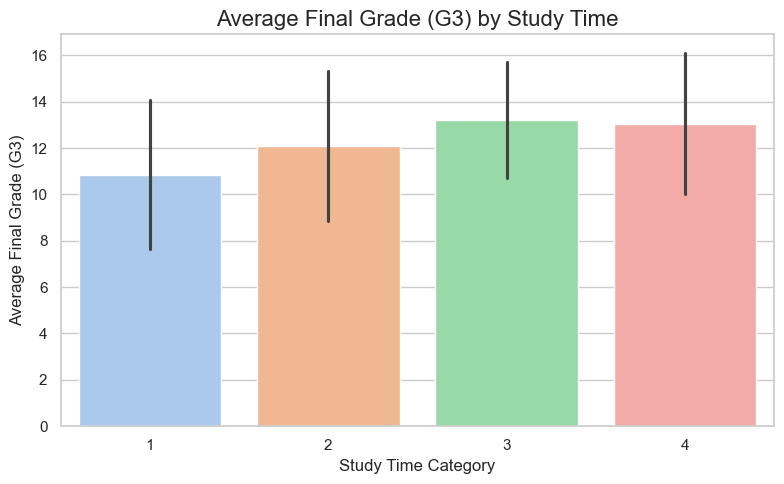

In [1037]:
plt.figure(figsize=(8,5))
sns.barplot(x='studytime', y='G3', data=df, ci='sd', palette='pastel')
plt.title('Average Final Grade (G3) by Study Time',fontsize=16)
plt.xlabel('Study Time Category')
plt.ylabel('Average Final Grade (G3)')
plt.tight_layout()
plt.show()

**More Study Time, Higher Grades**: Students in study time categories 3 and 4 (more hours of weekly study) have noticeably higher average final grades (G3) than those in categories 1 and 2.

**Lowest Grades with Least Study Time**: Study time category 1 (least time spent studying) has the lowest average grade, suggesting minimal study time is associated with poorer performance.



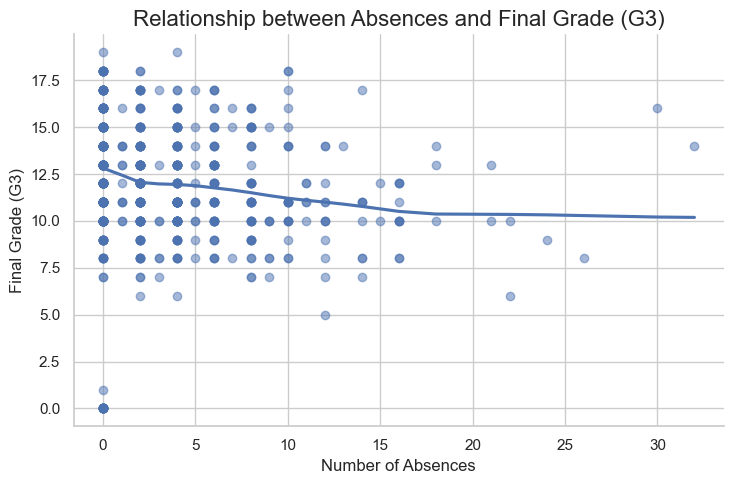

In [1039]:
sns.lmplot(x='absences', y='G3', data=df, lowess=True, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Relationship between Absences and Final Grade (G3)',fontsize=16)
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.tight_layout()
plt.show()

**Negative Trend**: The regression line shows a slight downward trend, indicating that as the number of absences increases, the final grade (G3) tends to slightly decrease.

**High Absences, Low Grades**: Most of the higher grades (15–20) are concentrated among students with fewer absences, while students with many absences (10 or more) generally score below average.

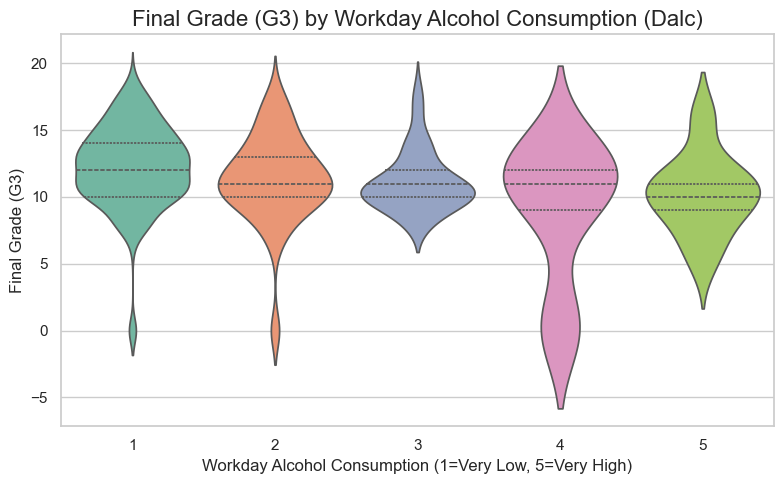

In [1041]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Dalc', y='G3', data=df, inner='quartile', palette='Set2')
plt.title('Final Grade (G3) by Workday Alcohol Consumption (Dalc)',fontsize=16)
plt.xlabel('Workday Alcohol Consumption (1=Very Low, 5=Very High)')
plt.ylabel('Final Grade (G3)')
plt.tight_layout()
plt.show()

**Lower Alcohol Consumption, Higher Grades**: Students with very low (1) or low (2) workday alcohol consumption tend to have higher final grades, as seen from the wider distribution toward the top.

**High Consumption, Lower Grades**: As alcohol consumption increases (especially categories 4 and 5), the density of higher grades decreases, and more students fall below the average.


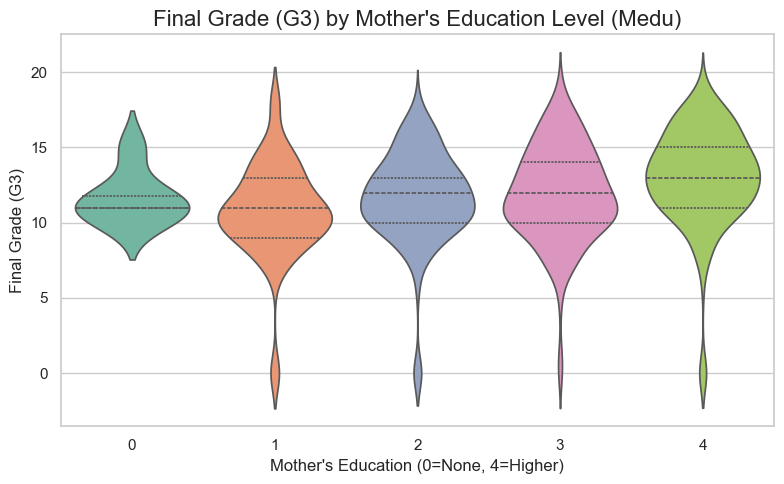

In [1043]:
# Violin plot
plt.figure(figsize=(8,5))
sns.violinplot(x='Medu', y='G3', data=df, inner='quartile', palette='Set2')
plt.title("Final Grade (G3) by Mother's Education Level (Medu)",fontsize=16)
plt.xlabel("Mother's Education (0=None, 4=Higher)")
plt.ylabel('Final Grade (G3)')
plt.tight_layout()
plt.show()

**Higher Education, Better Grades**: Students whose mothers have higher education levels (3 or 4) tend to achieve higher final grades, with the distributions shifting upward.

**Lower Education, Lower Performance**: Students with mothers who have no education (0) or low levels (1) tend to have lower median grades, indicating a possible link between parental education and academic success.



<h3 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Multivariate
</h3>

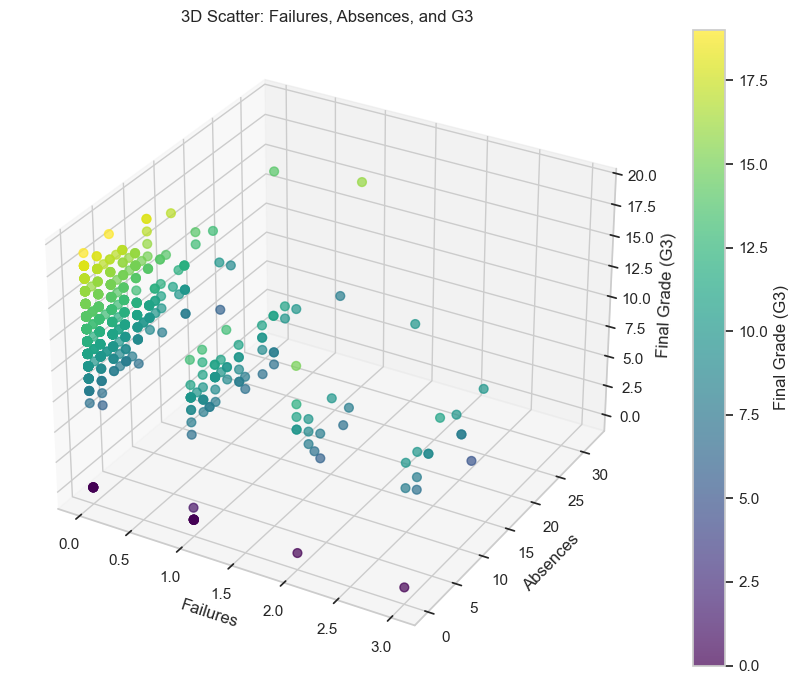

In [1046]:
# Define bins for categorizing absences
bins = [0, 2, 7, 100]
labels = ['Low (0-2)', 'Medium (3-7)', 'High (8+)']

# Categorize 'absences' into bins and create a new column 'abs_bin'
df['abs_bin'] = pd.cut(df['absences'], bins=bins, labels=labels, include_lowest=True)

# Create a new figure for the plot with size 10x7 inches
fig = plt.figure(figsize=(10,7))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
# X = failures, Y = absences, Z = final grade (G3)
# Color points based on G3 values using 'viridis' colormap
p = ax.scatter(df['failures'], df['absences'], df['G3'],
               c=df['G3'], cmap='viridis', s=40, alpha=0.7)

# Label the axes
ax.set_xlabel('Failures')
ax.set_ylabel('Absences')
ax.set_zlabel('Final Grade (G3)')

# Add a color bar to show the G3 value range
fig.colorbar(p, label='Final Grade (G3)')

# Set the plot title
plt.title('3D Scatter: Failures, Absences, and G3')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

***Students with 0 failures generally achieve higher final grades (G3 ≥ 10).***
This shows a clear negative impact of past academic failures on final performance.


***Higher absences are associated with lower grades.***
Students with more than 15 absences mostly score below G3 = 10.


***Top-performing students (G3 ≥ 15) have both low absences (< 10) and no prior failures.***
Consistent attendance and a clean academic record correlate strongly with success.

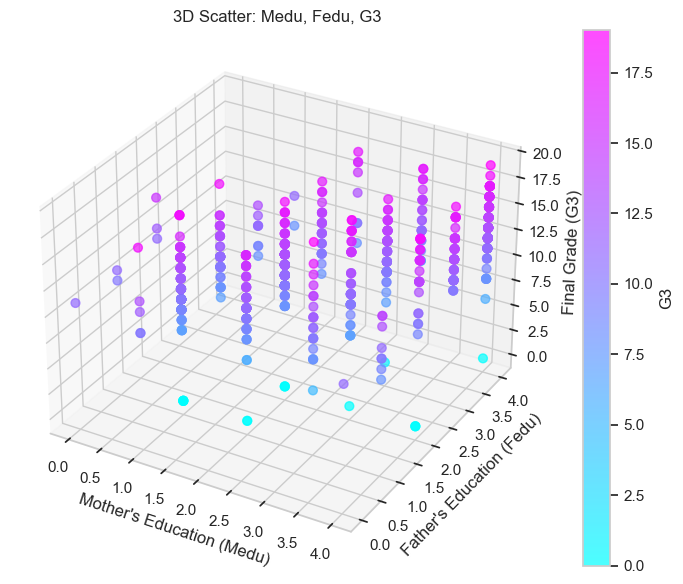

In [1048]:
for col in ['Medu', 'Fedu', 'G3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Medu'], df['Fedu'], df['G3'], c=df['G3'], cmap='cool', s=40, alpha=0.7)
ax.set_xlabel('Mother\'s Education (Medu)')
ax.set_ylabel('Father\'s Education (Fedu)')
ax.set_zlabel('Final Grade (G3)')
fig.colorbar(sc, label='G3')
plt.title('3D Scatter: Medu, Fedu, G3')
plt.tight_layout()
plt.show()

***Higher parental education levels are linked with better student performance***.
Most students with Medu and Fedu values of 3 or 4 tend to have higher G3 scores (above 10).


***Low parental education often corresponds with lower final grades***.
Students whose Medu and Fedu are 0 or 1 mostly have G3 below 10, suggesting limited educational support at home.


***Mother’s education appears slightly more influential***.
There is a denser clustering of higher grades along increasing Medu values, even when Fedu is lower.

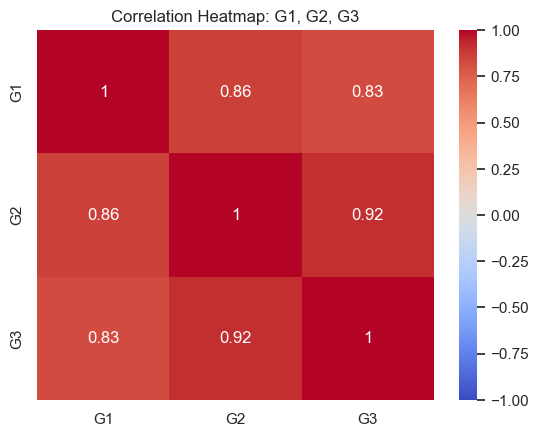

In [1050]:
corr = df[['G1', 'G2', 'G3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: G1, G2, G3')
plt.show()

G2 and G3 have a very strong positive correlation (0.92).


G1 also has a strong positive correlation with G3 (0.83).


This confirms that early term grades are highly predictive of the final grade.

<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Outlier Detection and Capping
</h2>

In [1053]:
num_df=df.select_dtypes(include='int')
num_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Checking Outliers
</h4>

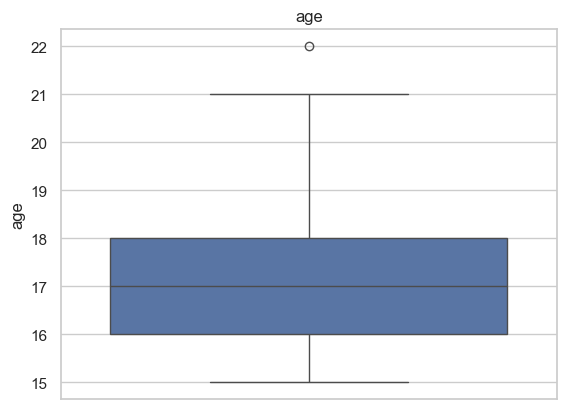

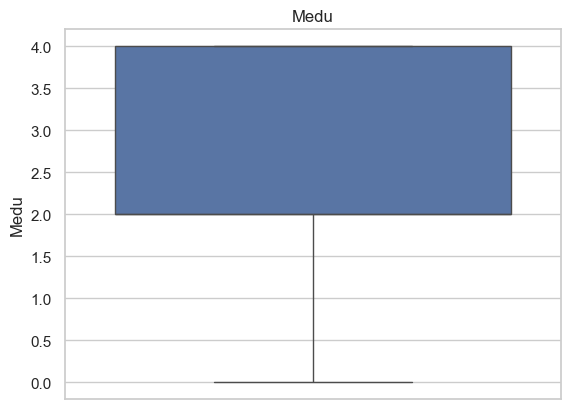

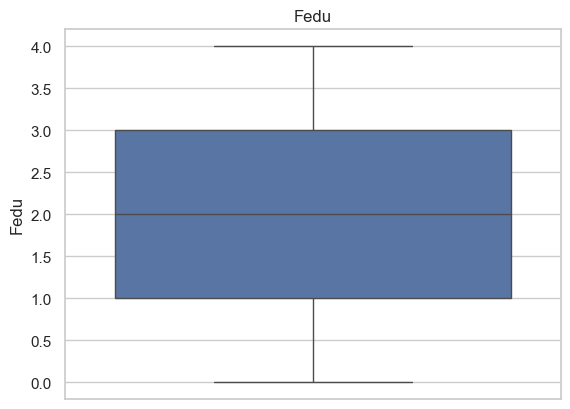

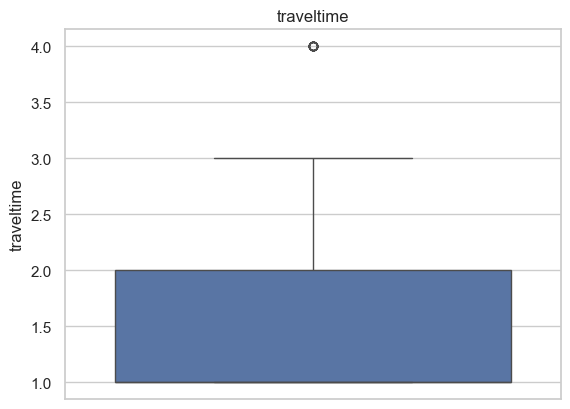

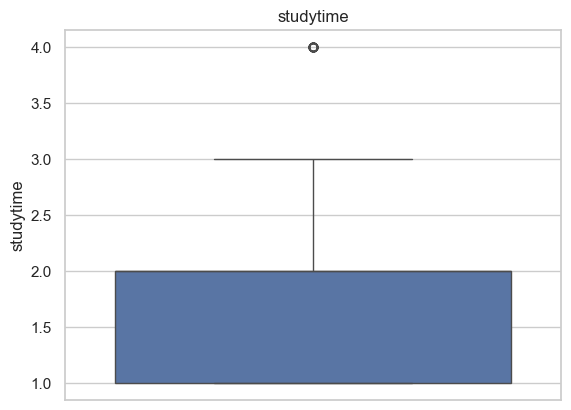

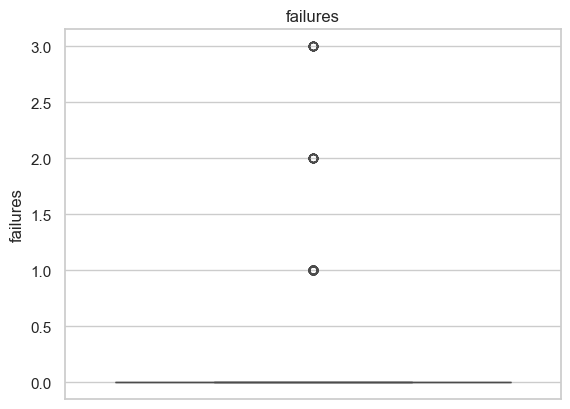

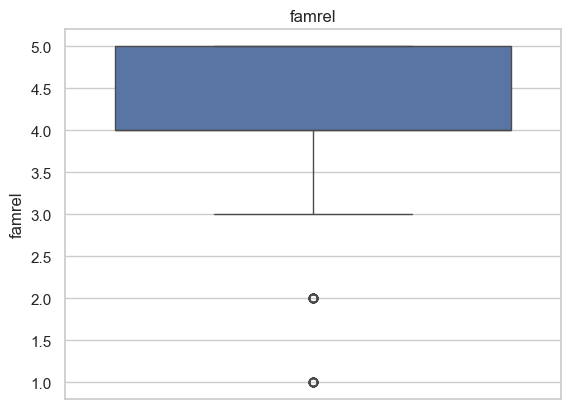

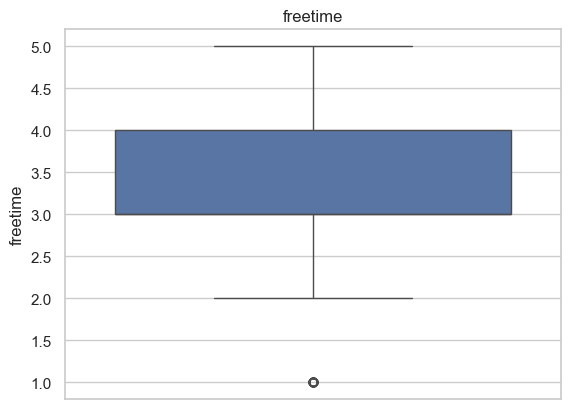

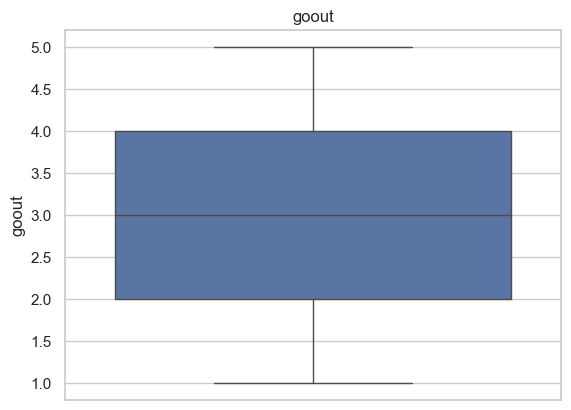

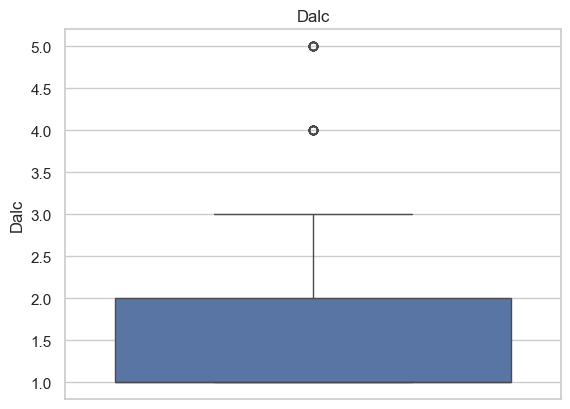

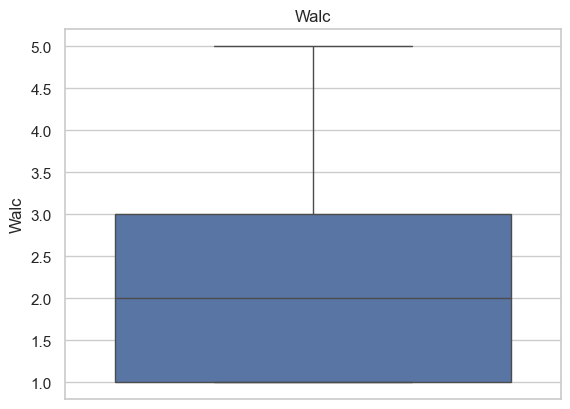

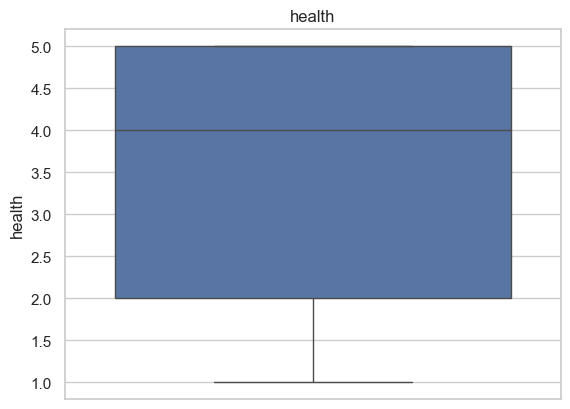

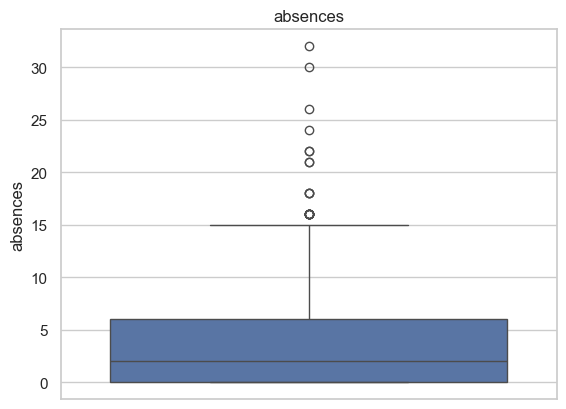

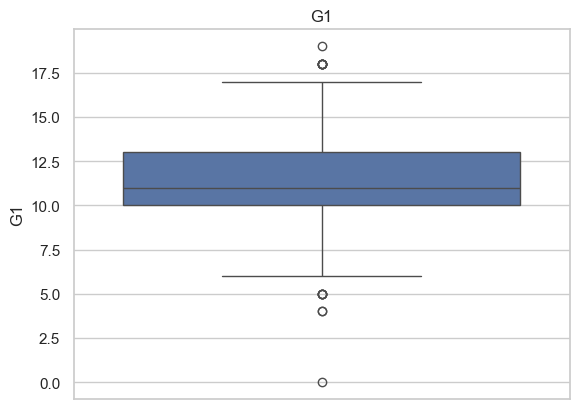

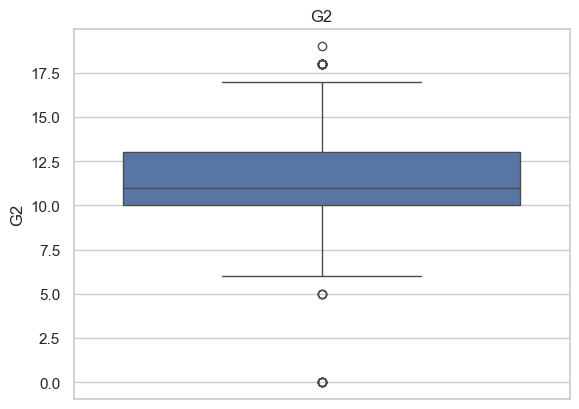

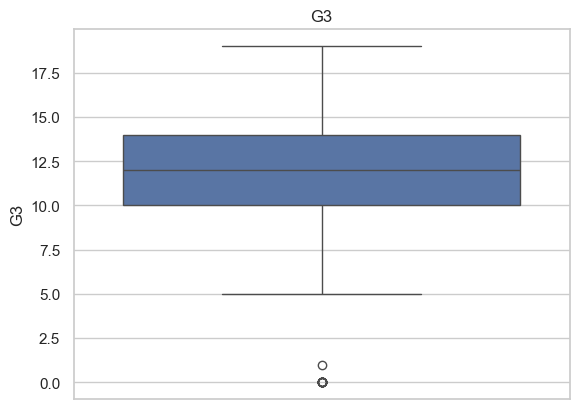

In [1055]:
for i in num_df:
    plt.title(i)
    sns.boxplot(num_df[i])
    plt.show()

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Outliers Capping
</h4>

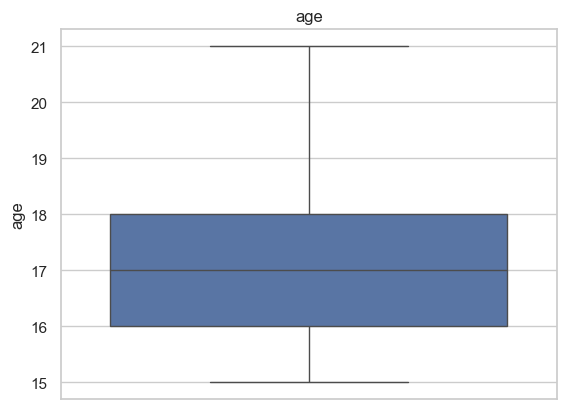

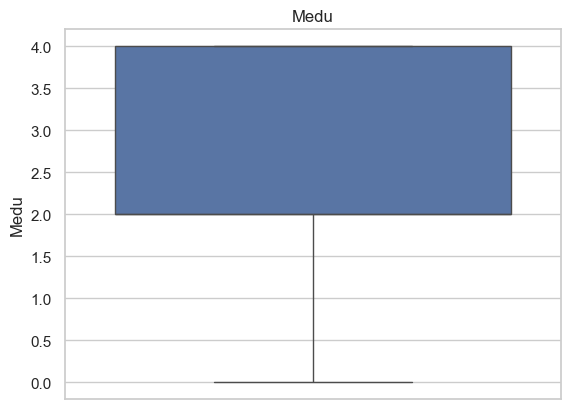

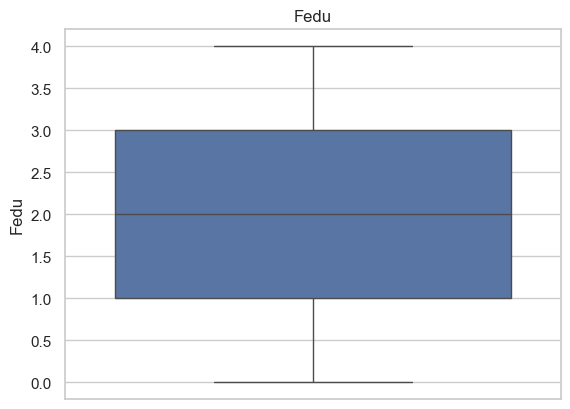

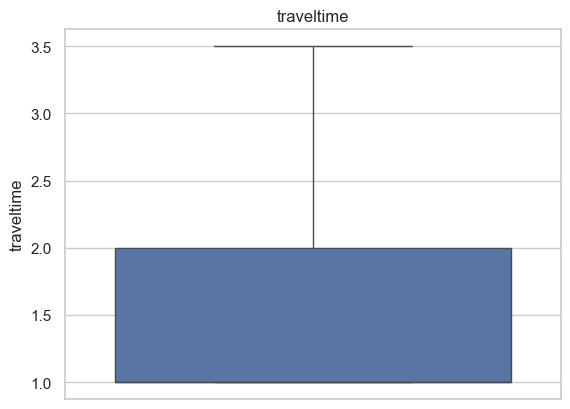

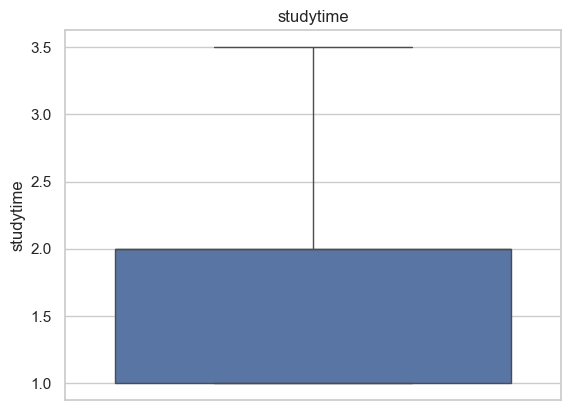

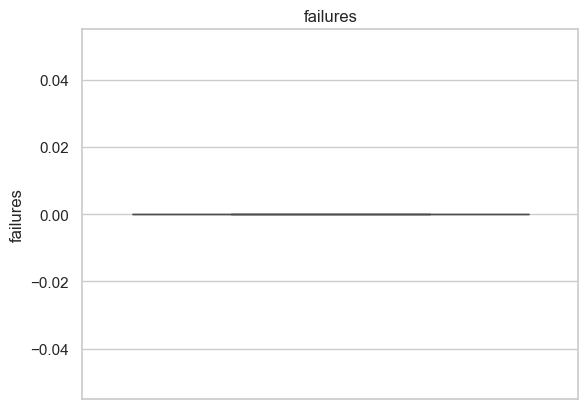

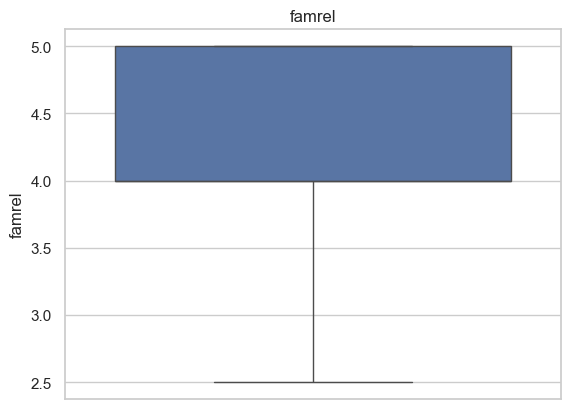

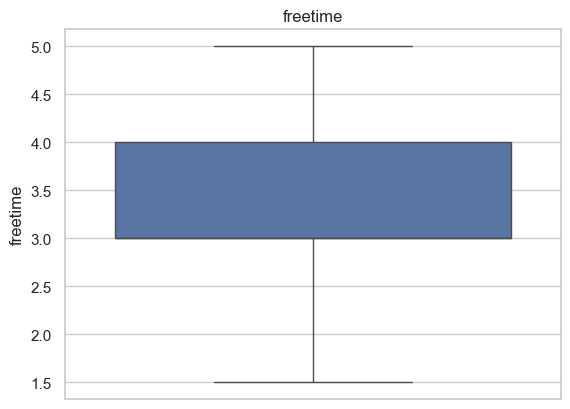

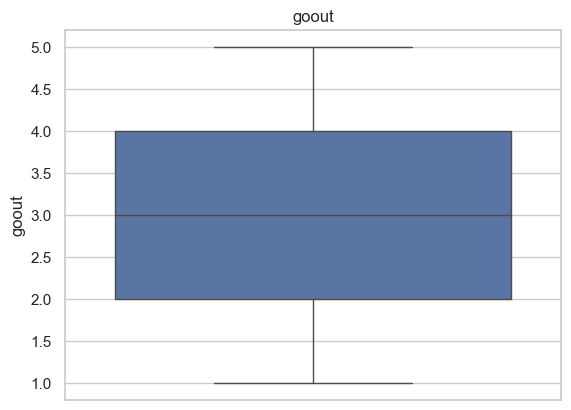

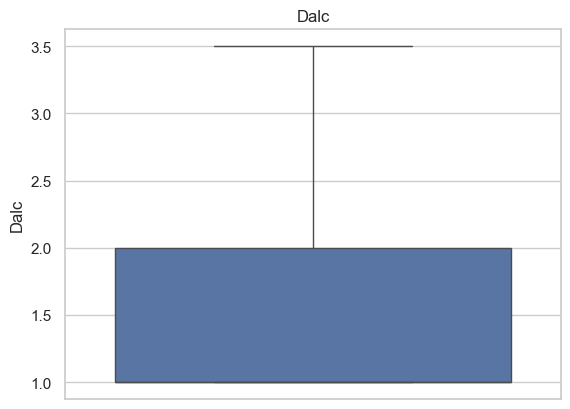

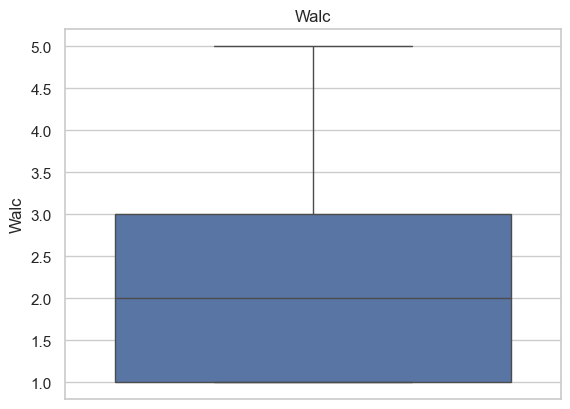

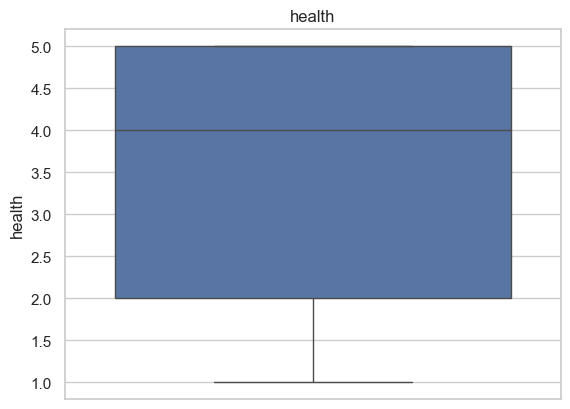

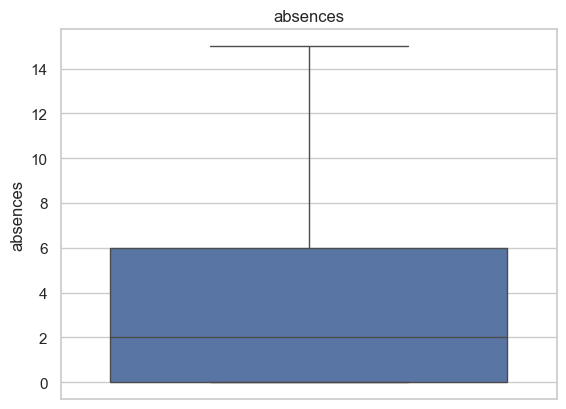

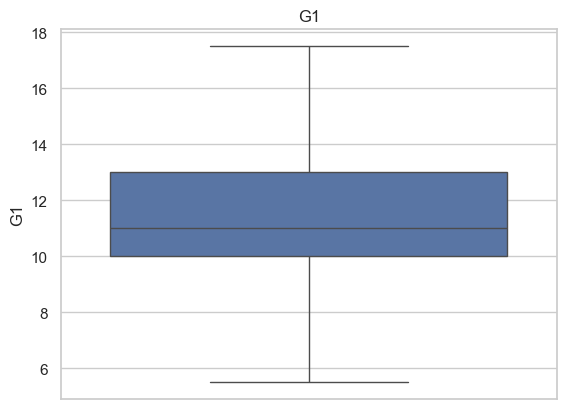

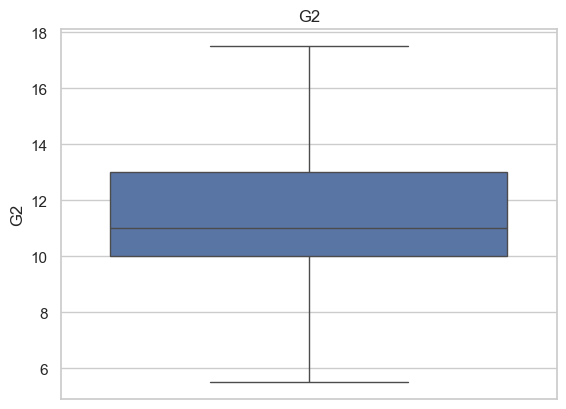

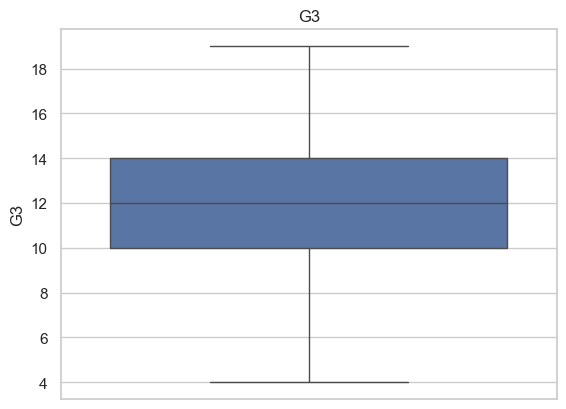

In [1057]:
for i in num_df:
    Q1=num_df[i].quantile(0.25)
    Q3=num_df[i].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    num_df[i]=np.clip(num_df[i],upper,lower)
    plt.title(i)
    sns.boxplot(num_df[i])
    plt.show()

In [1058]:
num_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2.0,2.0,0,4.0,3.0,4,1.0,1,3,4,5.5,11.0,11
1,17,1,1,1.0,2.0,0,5.0,3.0,3,1.0,1,3,2,9.0,11.0,11
2,15,1,1,1.0,2.0,0,4.0,3.0,2,2.0,3,3,6,12.0,13.0,12
3,15,4,2,1.0,3.0,0,3.0,2.0,2,1.0,1,5,0,14.0,14.0,14
4,16,3,3,1.0,2.0,0,4.0,3.0,2,1.0,2,5,0,11.0,13.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1.0,3.0,0,5.0,4.0,2,1.0,2,5,4,10.0,11.0,10
645,18,3,1,1.0,2.0,0,4.0,3.0,4,1.0,1,1,4,15.0,15.0,16
646,18,1,1,2.0,2.0,0,2.5,1.5,1,1.0,1,5,6,11.0,12.0,9
647,17,3,1,2.0,1.0,0,2.5,4.0,5,3.0,4,2,6,10.0,10.0,10


In [1059]:
num_df=num_df.drop(['failures'],axis=1)

"After capping, the values in the 'failures' column were changed to 0. Since 'failures' is important for prediction, I decided to drop it."


<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Encoding
</h2>

In [1062]:
cat_df=df.select_dtypes(include='object')
cat_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [1063]:
label_encoder= LabelEncoder()
for i in cat_df:
    cat_df[i]=label_encoder.fit_transform(cat_df[i]) 
cat_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,0,1,3,2,0,1,0,0,0,1,0,1,1,0
645,1,0,1,1,1,4,3,0,1,0,1,0,0,1,1,1,0
646,1,0,1,0,1,2,2,0,1,0,0,0,1,1,1,0,0
647,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0


In [1064]:
df=df.drop(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2','G3','abs_bin'],axis=1)

In [1065]:
student_df=pd.concat([num_df,cat_df,df],axis=1)
student_df

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,failures
0,18,4,4,2.0,2.0,4.0,3.0,4,1.0,1,...,1,1,0,0,0,1,1,0,0,0
1,17,1,1,1.0,2.0,5.0,3.0,3,1.0,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1.0,2.0,4.0,3.0,2,2.0,3,...,1,1,0,0,0,1,1,1,0,0
3,15,4,2,1.0,3.0,3.0,2.0,2,1.0,1,...,1,0,1,0,1,1,1,1,1,0
4,16,3,3,1.0,2.0,4.0,3.0,2,1.0,2,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1.0,3.0,5.0,4.0,2,1.0,2,...,1,0,0,0,1,0,1,1,0,1
645,18,3,1,1.0,2.0,4.0,3.0,4,1.0,1,...,1,0,1,0,0,1,1,1,0,0
646,18,1,1,2.0,2.0,2.5,1.5,1,1.0,1,...,1,0,0,0,1,1,1,0,0,0
647,17,3,1,2.0,1.0,2.5,4.0,5,3.0,4,...,1,0,0,0,0,0,1,1,0,0


In [1066]:
sum(student_df.duplicated(student_df.columns))

0

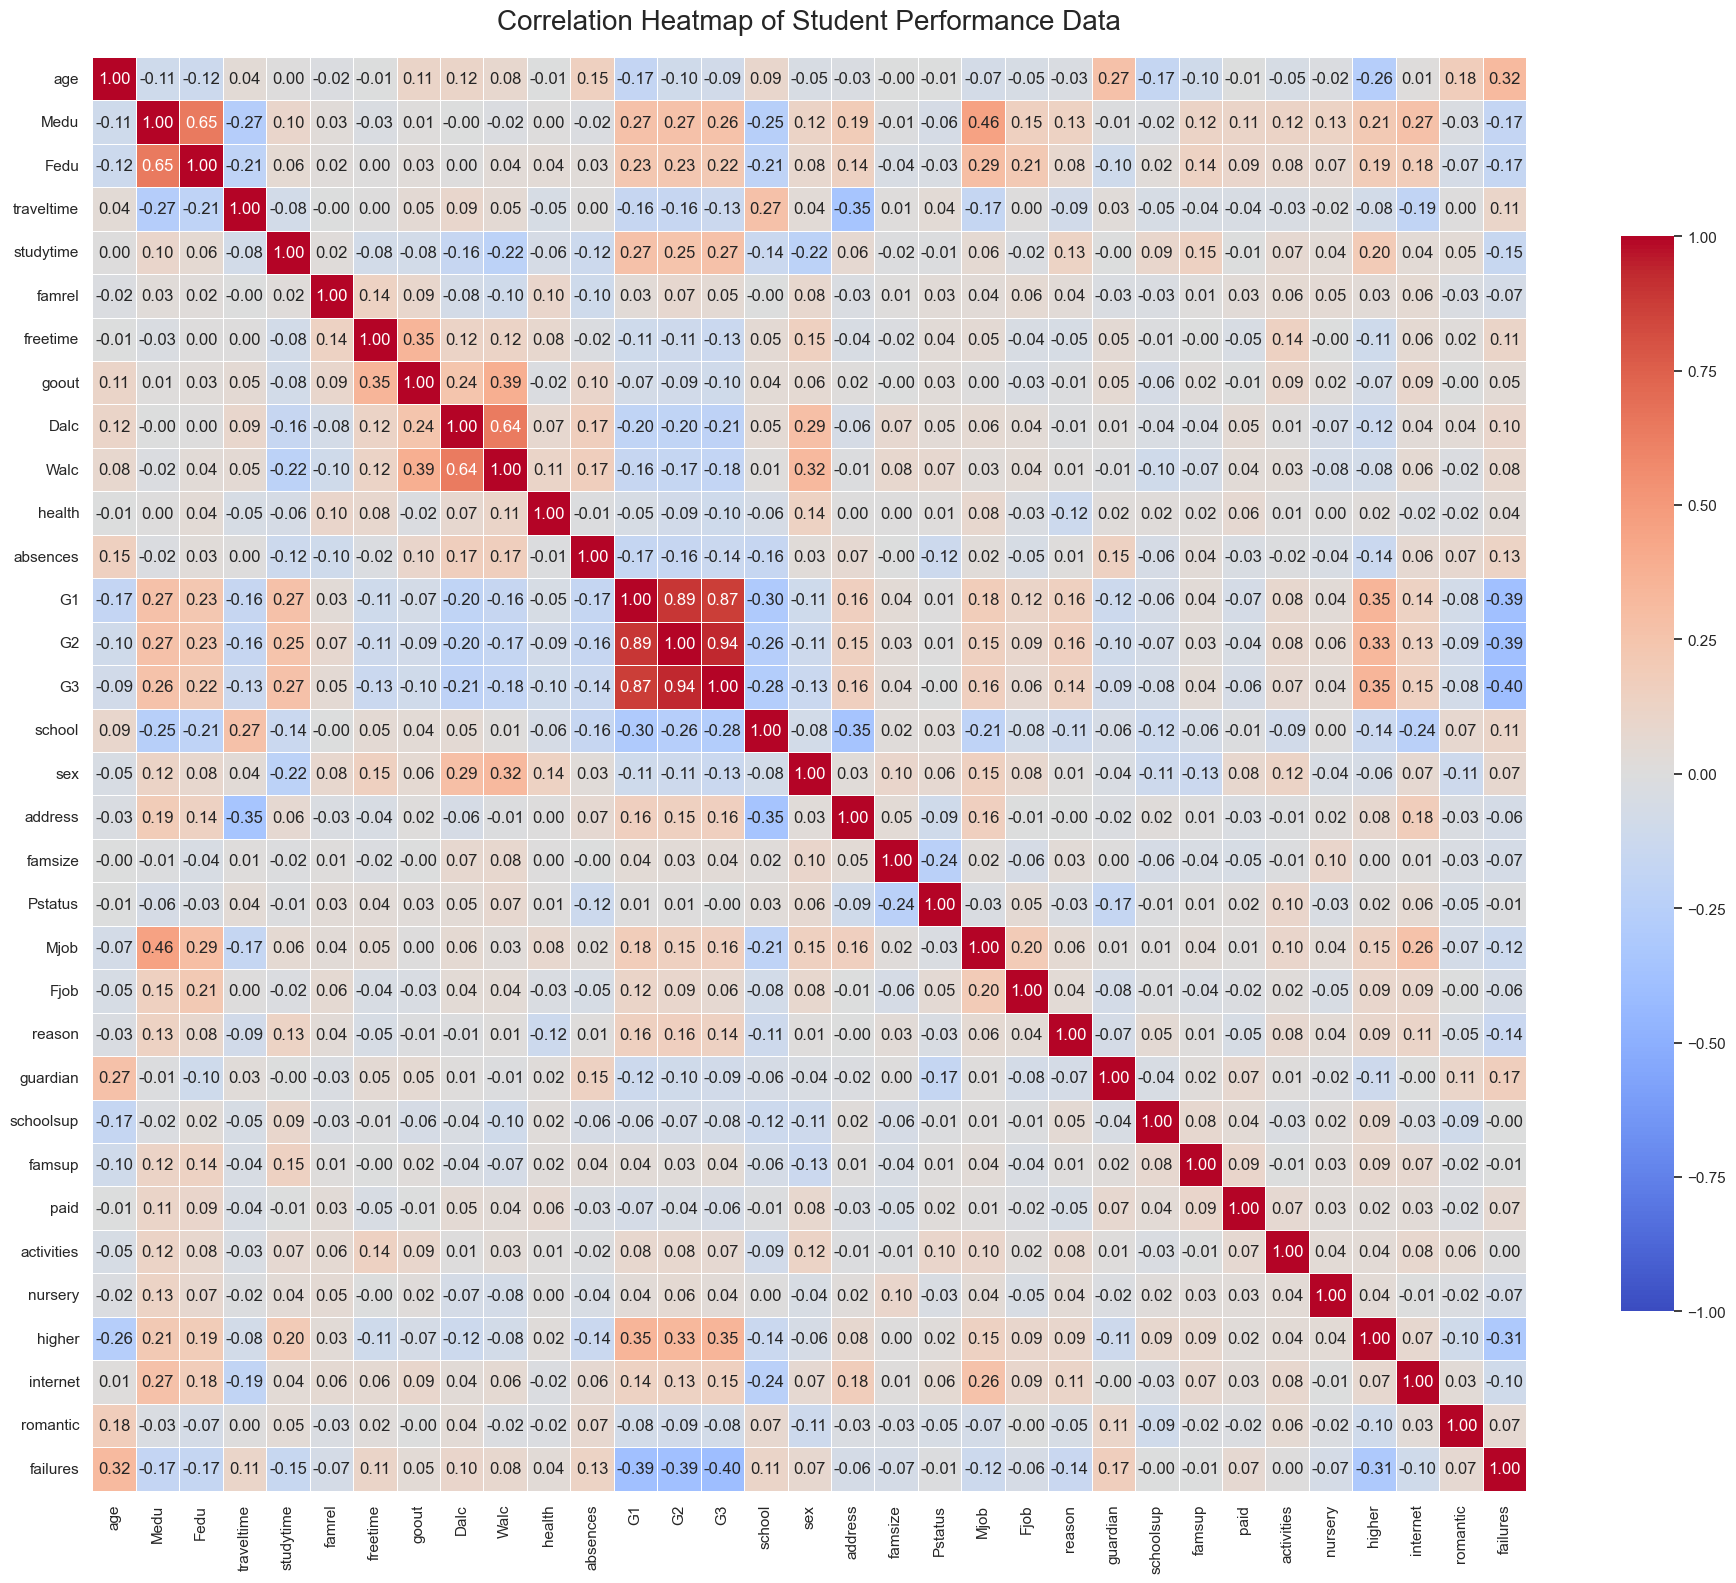

In [1067]:
plt.figure(figsize=(20, 16))
corr_matrix = student_df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    fmt=".2f",            # 2 decimal places
    cmap='coolwarm',      # Color map
    vmin=-1, vmax=1,      # Correlation range
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)

plt.title('Correlation Heatmap of Student Performance Data', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Feature Engineering
</h2>

In [1069]:
student_df['par-edu-avg']=(student_df['Medu']+student_df['Fedu'])/2
student_df['alc_total']=student_df['Dalc']+student_df['Walc']

In [1070]:
student_df=student_df.drop(['guardian','sex','school','G1','Medu','Fedu','Dalc','Walc'],axis=1)

“In the dataset, G1 and G2 represent the first and second period grades, while G3 is the final grade. Since both G1 and G2 are highly correlated with G3, including all of them in a linear regression model can cause multicollinearity issues. Among the two, G2 shows a stronger correlation with G3. Therefore, to reduce multicollinearity and improve model interpretability, G1 is removed from the dataset.”

<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Scaling
</h2>

In [1073]:
mas=MaxAbsScaler()
scaled_df=mas.fit_transform(student_df)
scaled_df

array([[0.85714286, 0.57142857, 0.57142857, ..., 0.        , 1.        ,
        0.23529412],
       [0.80952381, 0.28571429, 0.57142857, ..., 0.        , 0.25      ,
        0.23529412],
       [0.71428571, 0.28571429, 0.57142857, ..., 0.        , 0.25      ,
        0.58823529],
       ...,
       [0.85714286, 0.57142857, 0.57142857, ..., 0.        , 0.25      ,
        0.23529412],
       [0.80952381, 0.57142857, 0.28571429, ..., 0.        , 0.5       ,
        0.82352941],
       [0.85714286, 0.85714286, 0.28571429, ..., 0.        , 0.625     ,
        0.82352941]])

In [1074]:
data = pd.DataFrame(scaled_df, columns=student_df.columns)
data

,age,traveltime,studytime,famrel,freetime,goout,health,absences,G2,G3,...,famsup,paid,activities,nursery,higher,internet,romantic,failures,par-edu-avg,alc_total
0,0.857143,0.571429,0.571429,0.8,0.6,0.8,0.6,0.266667,0.628571,0.578947,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000,0.235294
1,0.809524,0.285714,0.571429,1.0,0.6,0.6,0.6,0.133333,0.628571,0.578947,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.250,0.235294
2,0.714286,0.285714,0.571429,0.8,0.6,0.4,0.6,0.400000,0.742857,0.631579,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.250,0.588235
3,0.714286,0.285714,0.857143,0.6,0.4,0.4,1.0,0.000000,0.800000,0.736842,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.750,0.235294
4,0.761905,0.285714,0.571429,0.8,0.6,0.4,1.0,0.000000,0.742857,0.684211,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.750,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.904762,0.285714,0.857143,1.0,0.8,0.4,1.0,0.266667,0.628571,0.526316,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.333333,0.625,0.352941
645,0.857143,0.285714,0.571429,0.8,0.6,0.8,0.2,0.266667,0.857143,0.842105,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.500,0.235294
646,0.857143,0.571429,0.571429,0.5,0.3,0.2,1.0,0.400000,0.685714,0.473684,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.250,0.235294
647,0.809524,0.571429,0.285714,0.5,0.8,1.0,0.4,0.400000,0.571429,0.526316,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.500,0.823529


<h2 style="text-align: center; color: #2E8B57; font-family: Arial; font-weight: bold;">
Building Regression Models
</h2>

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Splitting for Train and Test
</h4>

In [1077]:
x=data.drop(['G3'],axis=1)
y=data['G3']

In [1078]:
x

,age,traveltime,studytime,famrel,freetime,goout,health,absences,G2,address,...,famsup,paid,activities,nursery,higher,internet,romantic,failures,par-edu-avg,alc_total
0,0.857143,0.571429,0.571429,0.8,0.6,0.8,0.6,0.266667,0.628571,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,1.000,0.235294
1,0.809524,0.285714,0.571429,1.0,0.6,0.6,0.6,0.133333,0.628571,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.250,0.235294
2,0.714286,0.285714,0.571429,0.8,0.6,0.4,0.6,0.400000,0.742857,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.250,0.588235
3,0.714286,0.285714,0.857143,0.6,0.4,0.4,1.0,0.000000,0.800000,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.750,0.235294
4,0.761905,0.285714,0.571429,0.8,0.6,0.4,1.0,0.000000,0.742857,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.750,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.904762,0.285714,0.857143,1.0,0.8,0.4,1.0,0.266667,0.628571,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.333333,0.625,0.352941
645,0.857143,0.285714,0.571429,0.8,0.6,0.8,0.2,0.266667,0.857143,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.500,0.235294
646,0.857143,0.571429,0.571429,0.5,0.3,0.2,1.0,0.400000,0.685714,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.250,0.235294
647,0.809524,0.571429,0.285714,0.5,0.8,1.0,0.4,0.400000,0.571429,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.500,0.823529


In [1079]:
y

0      0.578947
1      0.578947
2      0.631579
3      0.736842
4      0.684211
         ...   
644    0.526316
645    0.842105
646    0.473684
647    0.526316
648    0.578947
Name: G3, Length: 649, dtype: float64

In [1080]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
LinearRegression
</h4>

In [1082]:
lr = LinearRegression() 
lr_model = lr.fit(x_train, y_train) 
lr_pred = lr_model.predict(x_test) 
lr_mse=mean_squared_error(y_test, lr_pred) 
lr_r2score=(r2_score(y_test, lr_pred)*100)
print(f"MSE:{lr_mse:.6f}")
print(f"R² Score:{lr_r2score:.2f}%")

MSE:0.002153
R² Score:91.34%


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Ridge
</h4>

In [1084]:
ridge = Ridge(alpha=1.0) 
ridge_model = ridge.fit(x_train, y_train) 
ridge_pred = ridge_model.predict(x_test) 
ridge_mse= mean_squared_error(y_test, ridge_pred)
ridge_r2score=(r2_score(y_test, ridge_pred)*100)
print(f"MSE:{ridge_mse:.6f}")
print(f"R² Score:{ridge_r2score:.2f}%")

MSE:0.002340
R² Score:90.59%


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
RandomForestRegressor
</h4>

In [1086]:
rfr = RandomForestRegressor() 
rfr_model = rfr.fit(x_train, y_train) 
rfr_pred = rfr_model.predict(x_test) 
rfr_mse= mean_squared_error(y_test, rfr_pred)
rfr_r2score=(r2_score(y_test, rfr_pred)*100)
print(f"MSE:{rfr_mse:.6f}")
print(f"R² Score:{rfr_r2score:.2f}%")

MSE:0.002498
R² Score:89.96%


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
GradientBoostingRegressor
</h4>

In [1088]:
gbr = GradientBoostingRegressor() 
gbr_model = gbr.fit(x_train, y_train) 
gbr_pred = gbr_model.predict(x_test) 
gbr_mse= mean_squared_error(y_test, gbr_pred)
gbr_r2score=(r2_score(y_test, gbr_pred)*100)
print(f"MSE:{gbr_mse:.6f}")
print(f"R² Score:{gbr_r2score:.2f}%")

MSE:0.002278
R² Score:90.84%


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
LGBMRegressor
</h4>

In [1090]:
lgbmr = LGBMRegressor(verbosity=-1) 
lgbmr_model = lgbmr.fit(x_train, y_train) 
lgbmr_pred = lgbmr_model.predict(x_test) 
lgbmr_mse= mean_squared_error(y_test, lgbmr_pred)
lgbmr_r2score=(r2_score(y_test, lgbmr_pred)*100)
print(f"MSE:{lgbmr_mse:.6f}")
print(f"R² Score:{lgbmr_r2score:.2f}%")

MSE:0.002469
R² Score:90.07%


<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
CatBoostRegressor
</h4>

In [1092]:
catr = CatBoostRegressor(verbose=0) 
catr_model = catr.fit(x_train, y_train) 
catr_pred = catr_model.predict(x_test) 
catr_mse= mean_squared_error(y_test, catr_pred)
catr_r2score=(r2_score(y_test, catr_pred)*100)
print(f"MSE:{catr_mse:.6f}")
print(f"R² Score:{catr_r2score:.2f}%")

MSE:0.002523
R² Score:89.85%


<h3 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Model Comparison Table
</h3>

In [1094]:
table = [['Model', 'MSE','R² Score'],
         ['LinearRegression', f"{lr_mse:.6f}",f"{lr_r2score:.2f}%"], 
         ['GradientBoostingRegressor',f"{gbr_mse:.6f}",f"{gbr_r2score:.2f}%"],
         ['Ridge',f"{ridge_mse:.6f}",f"{ridge_r2score:.2f}%"],
         ['LGBMRegressor',f"{lgbmr_mse:.6f}",f"{lgbmr_r2score:.2f}%"],
         ['RandomForestRegressor',f"{rfr_mse:.6f}",f"{rfr_r2score:.2f}%"], 
         ['CatBoostRegressor',f"{catr_mse:.6f}",f"{catr_r2score:.2f}%"]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════╤══════════╤════════════╕
│ Model                     │      MSE │ R² Score   │
╞═══════════════════════════╪══════════╪════════════╡
│ LinearRegression          │ 0.002153 │ 91.34%     │
├───────────────────────────┼──────────┼────────────┤
│ GradientBoostingRegressor │ 0.002278 │ 90.84%     │
├───────────────────────────┼──────────┼────────────┤
│ Ridge                     │ 0.00234  │ 90.59%     │
├───────────────────────────┼──────────┼────────────┤
│ LGBMRegressor             │ 0.002469 │ 90.07%     │
├───────────────────────────┼──────────┼────────────┤
│ RandomForestRegressor     │ 0.002498 │ 89.96%     │
├───────────────────────────┼──────────┼────────────┤
│ CatBoostRegressor         │ 0.002523 │ 89.85%     │
╘═══════════════════════════╧══════════╧════════════╛



<h4 style="text-align: center; color: black; font-family: Arial; font-weight: bold;">
Linear Regression Results
</h4>

In [1096]:
RMSE=np.sqrt(mean_squared_error(y_test, lr_pred))
MAE=mean_absolute_error(y_test, lr_pred)
print(f"MSE:{lr_mse:.6f}")
print(f"RMSE:{RMSE:.6f}")
print(f"MAE:{MAE:.6f}")
print(f"R² Score:{lr_r2score:.2f}%")

MSE:0.002153
RMSE:0.046402
MAE:0.036612
R² Score:91.34%


In [1097]:
print(f"R² Score(Test):{lr_r2score:.2f}%")
train_pred=lr_model.predict(x_train)
r2score_train=(r2_score(y_train, train_pred)*100)
print(f"R² Score(Train):{r2score_train:.2f}%")

R² Score(Test):91.34%
R² Score(Train):87.17%


    •	If training R² ≈ test R², the model is well-balanced (not overfitting).
	•	If training R² >> test R², the model is likely overfitting.
	•	If both R² scores are low, the model may be underfitting.

After training the Linear Regression model, I checked the performance using both training and test datasets.

	•	Train R² Score: 87.22%
	•	Test R² Score: 91.25%

This shows that the model performs slightly better on the test data than on the training data. Since the scores are close and there’s no large gap between them, it means the model is not overfitting. Instead, it’s generalizing well to new, unseen data. The high R² score on the test data also indicates that the model is predicting accurately overall.

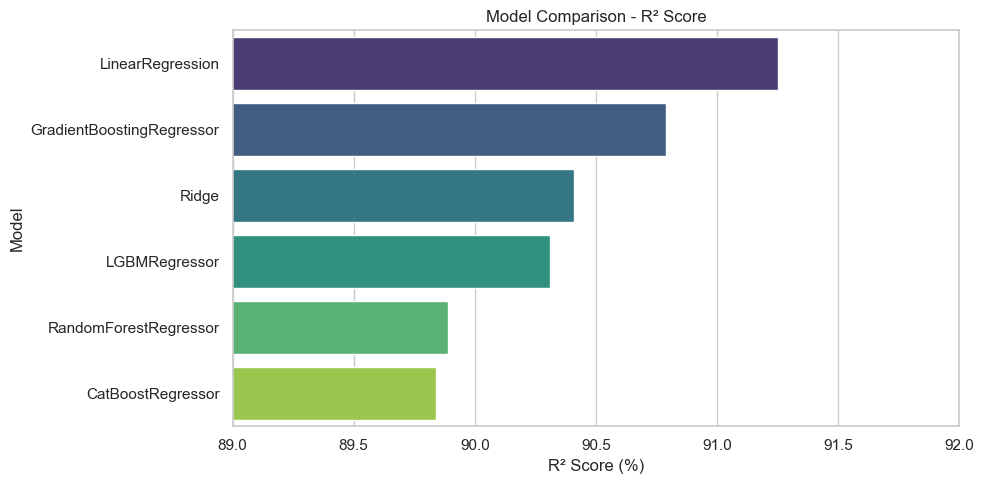

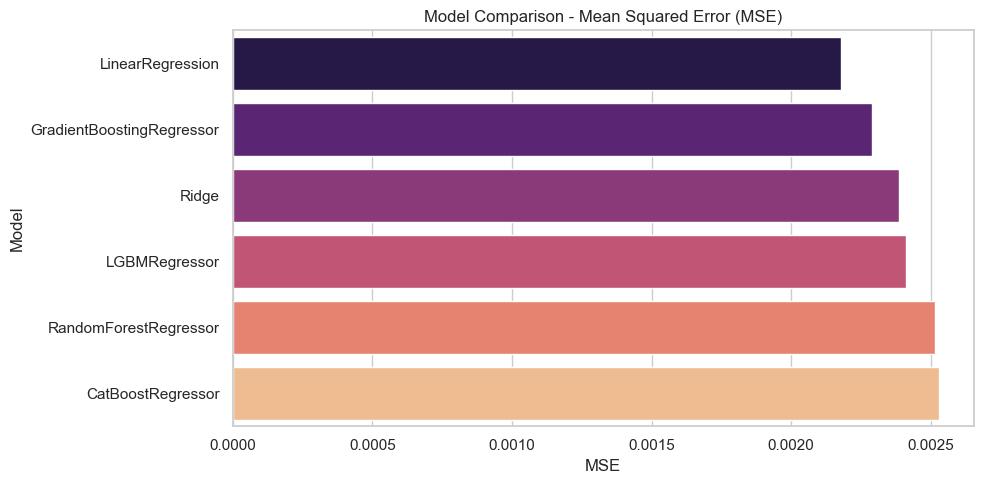

In [1100]:

data = {
    'Model': [
        'LinearRegression',
        'GradientBoostingRegressor',
        'Ridge',
        'LGBMRegressor',
        'RandomForestRegressor',
        'CatBoostRegressor'
    ],
    'MSE': [
        0.002177,
        0.00229,
        0.002385,
        0.00241,
        0.002515,
        0.002528
    ],
    'R2 Score': [
        91.25,
        90.79,
        90.41,
        90.31,
        89.89,
        89.84
    ]
}


df = pd.DataFrame(data)


sns.set(style="whitegrid")

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Model', data=df, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.xlabel('R² Score (%)')
plt.ylabel('Model')
plt.xlim(89, 92)
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(10, 5))
sns.barplot(x='MSE', y='Model', data=df, palette='magma')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xlabel('MSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

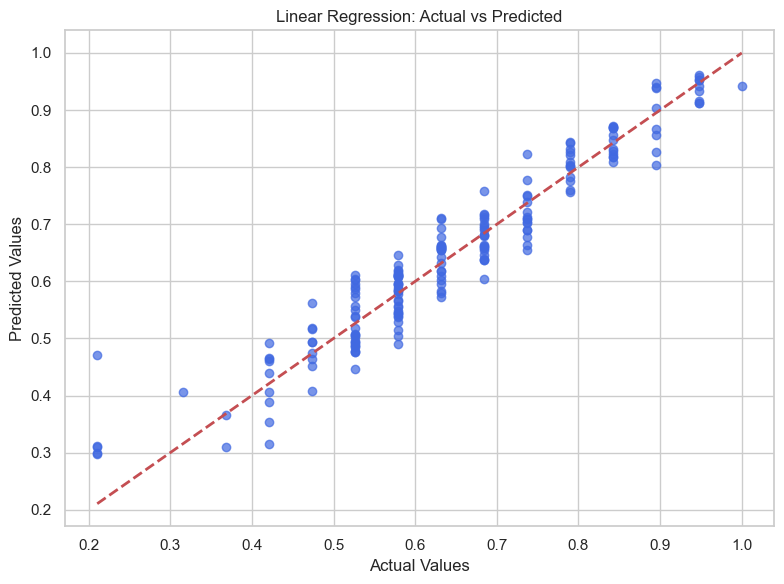

In [1101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

    •	Points are close to the line, meaning errors (residuals) are relatively small.
	•	There are a few outliers — especially at lower actual values (around 0.2 to 0.4) — but they are not extreme.